# Tarea 4: Pruebas de hipótesis

Solución de los ejercicios de la sección `Pruebas de hipótesis` del libro del curos [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/pruebas-de-hip%C3%B3tesis.html)

El siguiente video es bastante claro sobre lo que hace una [prueba de permutación](https://www.youtube.com/watch?v=rJ3AZCQuiLw)

# Pruebas visuales y permutación

## Pruebas de permutación
La tabla de datos `Phillies2009.csv`  contiene información de la temporada de baseball 2009 para el equipo de Philadelphia Phillies, en este ejercicio queremos comparar los strikes (`StrikeOuts`) entre los juegos en casa y de visitante.

### Carga de datos

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as plt
import matplotlib.pyplot as plt

from utils import ordenar_tendencia_central, tabla_prueba_permutacion

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros']

In [4]:
#Se obtiene dataset original
file_path = "datos\\Phillies2009.csv"
phillies = pd.read_csv(os.path.join(path_asignatura, file_path))
phillies.head()

,Date,Location,Outcome,Hits,Doubles,HomeRuns,StrikeOuts
0,5-Apr,Home,Lose,4,2,0,6
1,7-Apr,Home,Lose,6,1,0,3
2,8-Apr,Home,Win,11,3,1,6
3,10-Apr,Away,Lose,7,2,1,3
4,11-Apr,Away,Win,15,3,1,6


In [5]:
print(f"Dimensiones del conjunto de datos: {phillies.shape}")

Dimensiones del conjunto de datos: (162, 7)


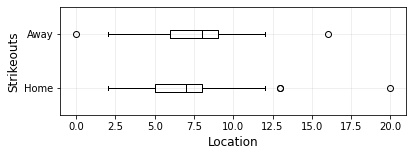

In [6]:
#Se ordena el dataset con respecto a la mediana
ordenar_tendencia_central(phillies, 'Location', 'StrikeOuts', mo='median')

#Graficamos todo el conjunto de datos
ax = phillies.boxplot(by='Location', column='StrikeOuts', figsize=(6,2), vert=False, color='black')
ax.set_title('')
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("Strikeouts", fontsize=12)
ax.grid(alpha=0.25)

plt.suptitle('')
plt.show()

### Ejercicio 1
Realiza un lineup donde cada panel muestre un diagrama de caja y brazos para la variable de interés separando los juegos jugados en casa (`home`) y los juegos jugados fuera (`away`). ¿Puedes localizar los datos verdaderos entre los nulos?

In [7]:
agrupadora = 'Location'
permutadora = 'StrikeOuts'

perm_df = tabla_prueba_permutacion(phillies, agrupadora, permutadora)
perm_df

,Location,10,12,4,11,15,18,6,16,3,...,StrikeOuts,0,9,14,1,5,2,7,17,13
0,Home,9,4,9,6,5,9,5,9,8,...,6,9,8,6,4,6,12,6,6,12
1,Home,7,5,6,7,0,8,8,7,7,...,3,10,3,7,7,6,10,5,8,4
2,Home,8,4,9,8,6,10,7,10,6,...,6,5,12,10,8,9,3,8,7,5
3,Away,3,9,6,9,9,8,7,5,7,...,3,8,9,9,5,6,12,9,6,8
4,Away,9,9,4,3,7,7,6,2,5,...,6,20,10,7,7,9,9,5,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Home,6,8,4,7,6,8,8,5,8,...,2,7,8,9,4,6,6,7,12,2
158,Home,12,3,8,8,8,0,4,8,7,...,8,5,9,6,11,4,4,8,7,9
159,Home,7,11,7,8,12,7,8,7,5,...,4,8,6,4,8,8,2,3,7,3
160,Home,7,7,3,10,8,7,7,13,3,...,4,4,4,7,7,7,7,6,0,6


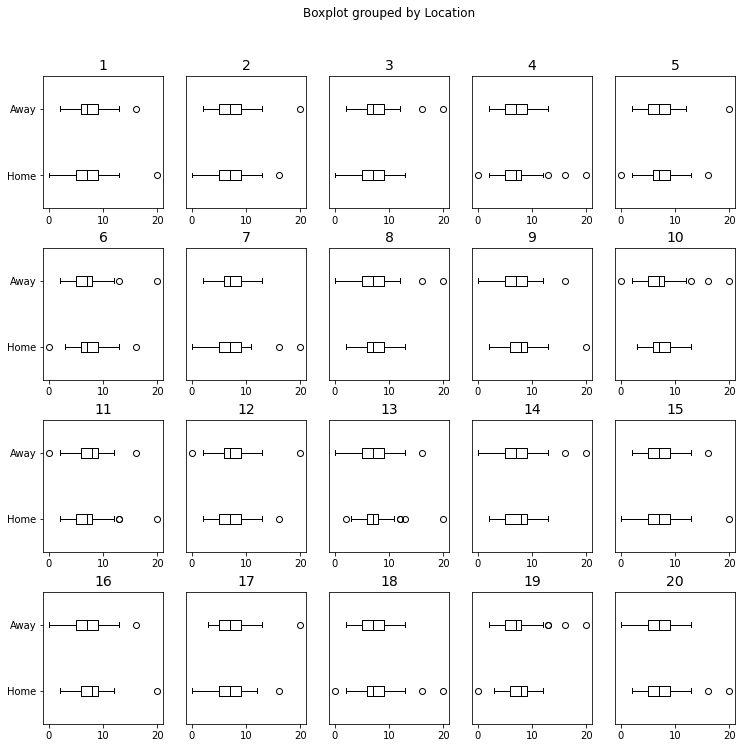

In [8]:
fig = plt.figure(figsize=(12,12))
spec = plt.GridSpec(ncols=5, nrows=4, hspace=0.3)

#Paneles
for i in np.arange(1,21):
    ax_n = f"ax{i}"
    ax_n = fig.add_subplot(spec[i-1])
    perm_df.boxplot(by=agrupadora, column=perm_df.columns[i], vert=False, color='black', ax=ax_n)
    ax_n.set_title(i, fontsize=14)
    ax_n.set_xlabel('')
    ax_n.grid(False)
    
    if (i-1)%5 != 0:
        ax_n.set_yticks([])

plt.show()

Yo no puedo identificar los datos verdaderos.

### Ejercicio 2
Calcula el promedio de strikes por juego en cada grupo (donde grupo se define por Location).

In [9]:
#Se obtiene dataset original
file_path = "datos\\Phillies2009.csv"
phillies = pd.read_csv(os.path.join(path_asignatura, file_path))
phillies.head()

,Date,Location,Outcome,Hits,Doubles,HomeRuns,StrikeOuts
0,5-Apr,Home,Lose,4,2,0,6
1,7-Apr,Home,Lose,6,1,0,3
2,8-Apr,Home,Win,11,3,1,6
3,10-Apr,Away,Lose,7,2,1,3
4,11-Apr,Away,Win,15,3,1,6


In [10]:
phillies.groupby(by='Location').mean()[['StrikeOuts']]

,StrikeOuts
Location,
Away,7.308642
Home,6.950617


### Ejercicio 3
Realiza una prueba de permutación para la diferencia de las medias. Grafica la
distribución de referencia y calcula el valor $p$ de dos colas.

Método para cálculo de diferencia de medias obtenido de [Practical Statistics for Data Science, O'Reilly](https://github.com/gedeck/practical-statistics-for-data-scientists)

In [11]:
import random

In [12]:
mean_a = phillies[phillies['Location'] == 'Home']['StrikeOuts'].mean()
mean_b = phillies[phillies['Location'] == 'Away']['StrikeOuts'].mean()
print(mean_b - mean_a)

0.3580246913580245


In [13]:
# Prueba de permutación para diferencia de medias
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()#, idx_A, idx_B
    
nA = phillies[phillies['Location'] == 'Home'].shape[0]
nB = phillies[phillies['Location'] == 'Away'].shape[0]

perm_fun(phillies['StrikeOuts'], nA, nB)

-0.8765432098765427

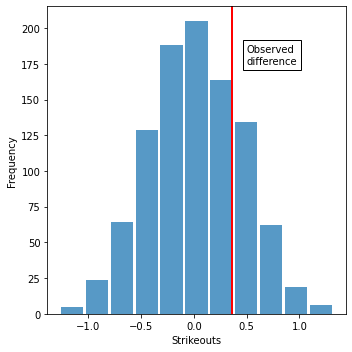

In [14]:
#Ejecutando 1,000 iteraciones
n = 1_000
random.seed(1)
perm_diffs = [perm_fun(phillies['StrikeOuts'], nA, nB) for _ in range(n)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9, alpha=0.75)
ax.axvline(x = mean_b - mean_a, color='red', lw=2)
ax.text(0.5, 175, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Strikeouts')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

$$p_{val}=\frac{card(TS_{P}>TS_{OBS})}{card(p)}$$
Siendo:
* $TS_P$: Permutation Test Statistic
* $TS_{OBS}$: Observed Test Statistic

In [15]:
print(f"p-val: {sum(perm_diffs > (mean_b - mean_a)) / n}")

p-val: 0.221
